In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from datetime import datetime
from imblearn.over_sampling import SMOTE

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
def generate_chunk_html(df_chunk):
    html = df_chunk.to_html(classes='table table-striped', index=False)
    return html

def display_scrollable_table(df, chunk_size=100):
    html_output = "<div style='overflow: auto; max-height: 400px; width:100%;'>"
    for i in range(0, len(df), chunk_size):
        df_chunk = df[i:i + chunk_size] 
        html_output += generate_chunk_html(df_chunk)

    html_output += "</div>"
    display(HTML(html_output))

In [25]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("data/raw/train.csv")

In [26]:
display_scrollable_table(df)

In [27]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

In [28]:
df.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
SaleType            9
OverallCond         9
Condition1          9
BedroomAbvGr        8
HouseStyle          8
Condition2          8
PoolArea            8
RoofMatl            8
Functional          7
SaleCondition       6
BsmtFinType1        6
RoofStyle           6
BsmtFinType2        6
Heating             6
Foundation          6
GarageType

In [29]:
for column in df:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("-" * 30)

Unique values for column 'Id':
[   1    2    3 ... 1458 1459 1460]
------------------------------
Unique values for column 'MSSubClass':
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
------------------------------
Unique values for column 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']
------------------------------
Unique values for column 'LotFrontage':
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
------------------------------
Unique values for column 'LotArea':

In [30]:
for column in df.isnull().sum().sort_values(ascending=False).index:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("-" * 30)

Unique values for column 'PoolQC':
[nan 'Ex' 'Fa' 'Gd']
------------------------------
Unique values for column 'MiscFeature':
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
------------------------------
Unique values for column 'Alley':
[nan 'Grvl' 'Pave']
------------------------------
Unique values for column 'Fence':
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
------------------------------
Unique values for column 'MasVnrType':
['BrkFace' nan 'Stone' 'BrkCmn']
------------------------------
Unique values for column 'FireplaceQu':
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
------------------------------
Unique values for column 'LotFrontage':
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  

In [31]:
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
    df[col] = df[col].fillna('No' + col[:-2])  #Dynamic "NoPool", "NoMisc" etc

# Masonry Veneer
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = np.where(df['MasVnrType'] == 'None', 0,
                            df['MasVnrArea'].fillna(
                                df['MasVnrArea'].median()))  # Impute median if not None


# Garage-Related Columns
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('NoGarage')
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    df[col] = df[col].fillna(0)


# Basement-Related Columns
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2']:
    df[col] = df[col].fillna('NoBasement')
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath']:
    df[col] = df[col].fillna(0)


# LotFrontage (Grouped Median Imputation)
df['LotFrontage'] = df['LotFrontage'].fillna(
    df.groupby('Neighborhood')['LotFrontage'].transform('median'))

# If still missing LotFrontage after grouping (rare neighborhoods)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())


# Electrical (Mode Imputation)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Drop the ID column since it's not needed anymore
df = df.drop('Id', axis=1)

In [32]:
#Verify no missing values left
df.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
dtype: int64

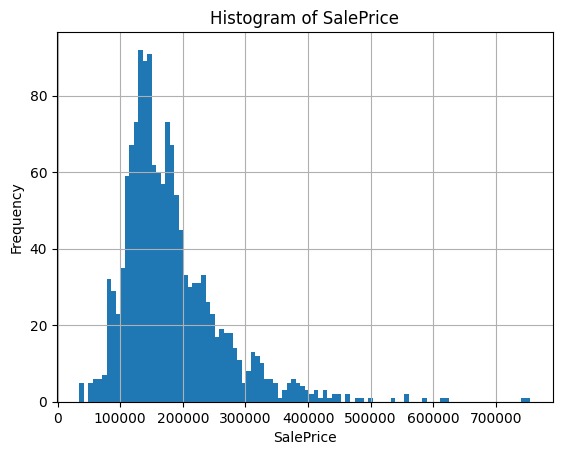

In [33]:
# Histograms of SalePrice
for column in ['SalePrice']:
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

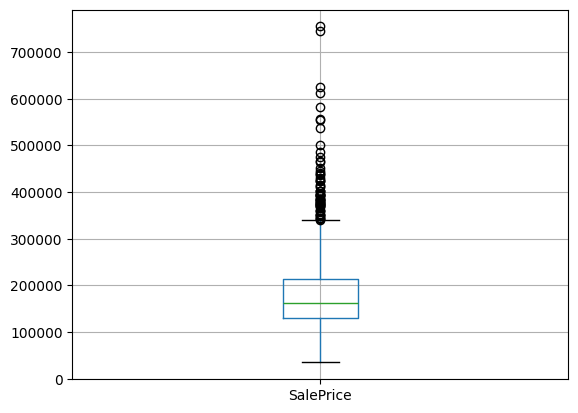

In [34]:
# Boxplot of price and area
for column in ['SalePrice']:
    df.boxplot(column)
    plt.show()

In [35]:
# def replace_outliers_iqr(df, column, iqr_factor=1.5):

#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - iqr_factor * IQR
#     upper_bound = Q3 + iqr_factor * IQR

#     # Create a copy to avoid modifying the original DataFrame directly
#     df_copy = df.copy()

#     # Replace outliers with the bounds
#     df_copy[column] = np.where(df_copy[column] < lower_bound, lower_bound, df_copy[column])
#     df_copy[column] = np.where(df_copy[column] > upper_bound, upper_bound, df_copy[column])

#     return df_copy


# #Apply IQR outlier removal to ALL numerical columns *before* scaling and splitting.
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# for col in ['SalePrice']:
#     df = replace_outliers_iqr(df, col) # replace outliers with IQR bounds

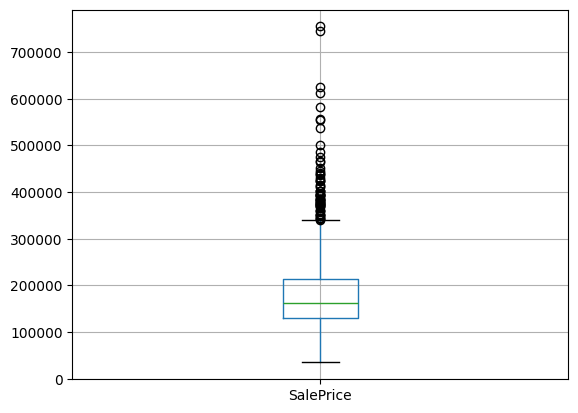

In [36]:
# Boxplot of price and area
for column in ['SalePrice']:
    df.boxplot(column)
    plt.show()

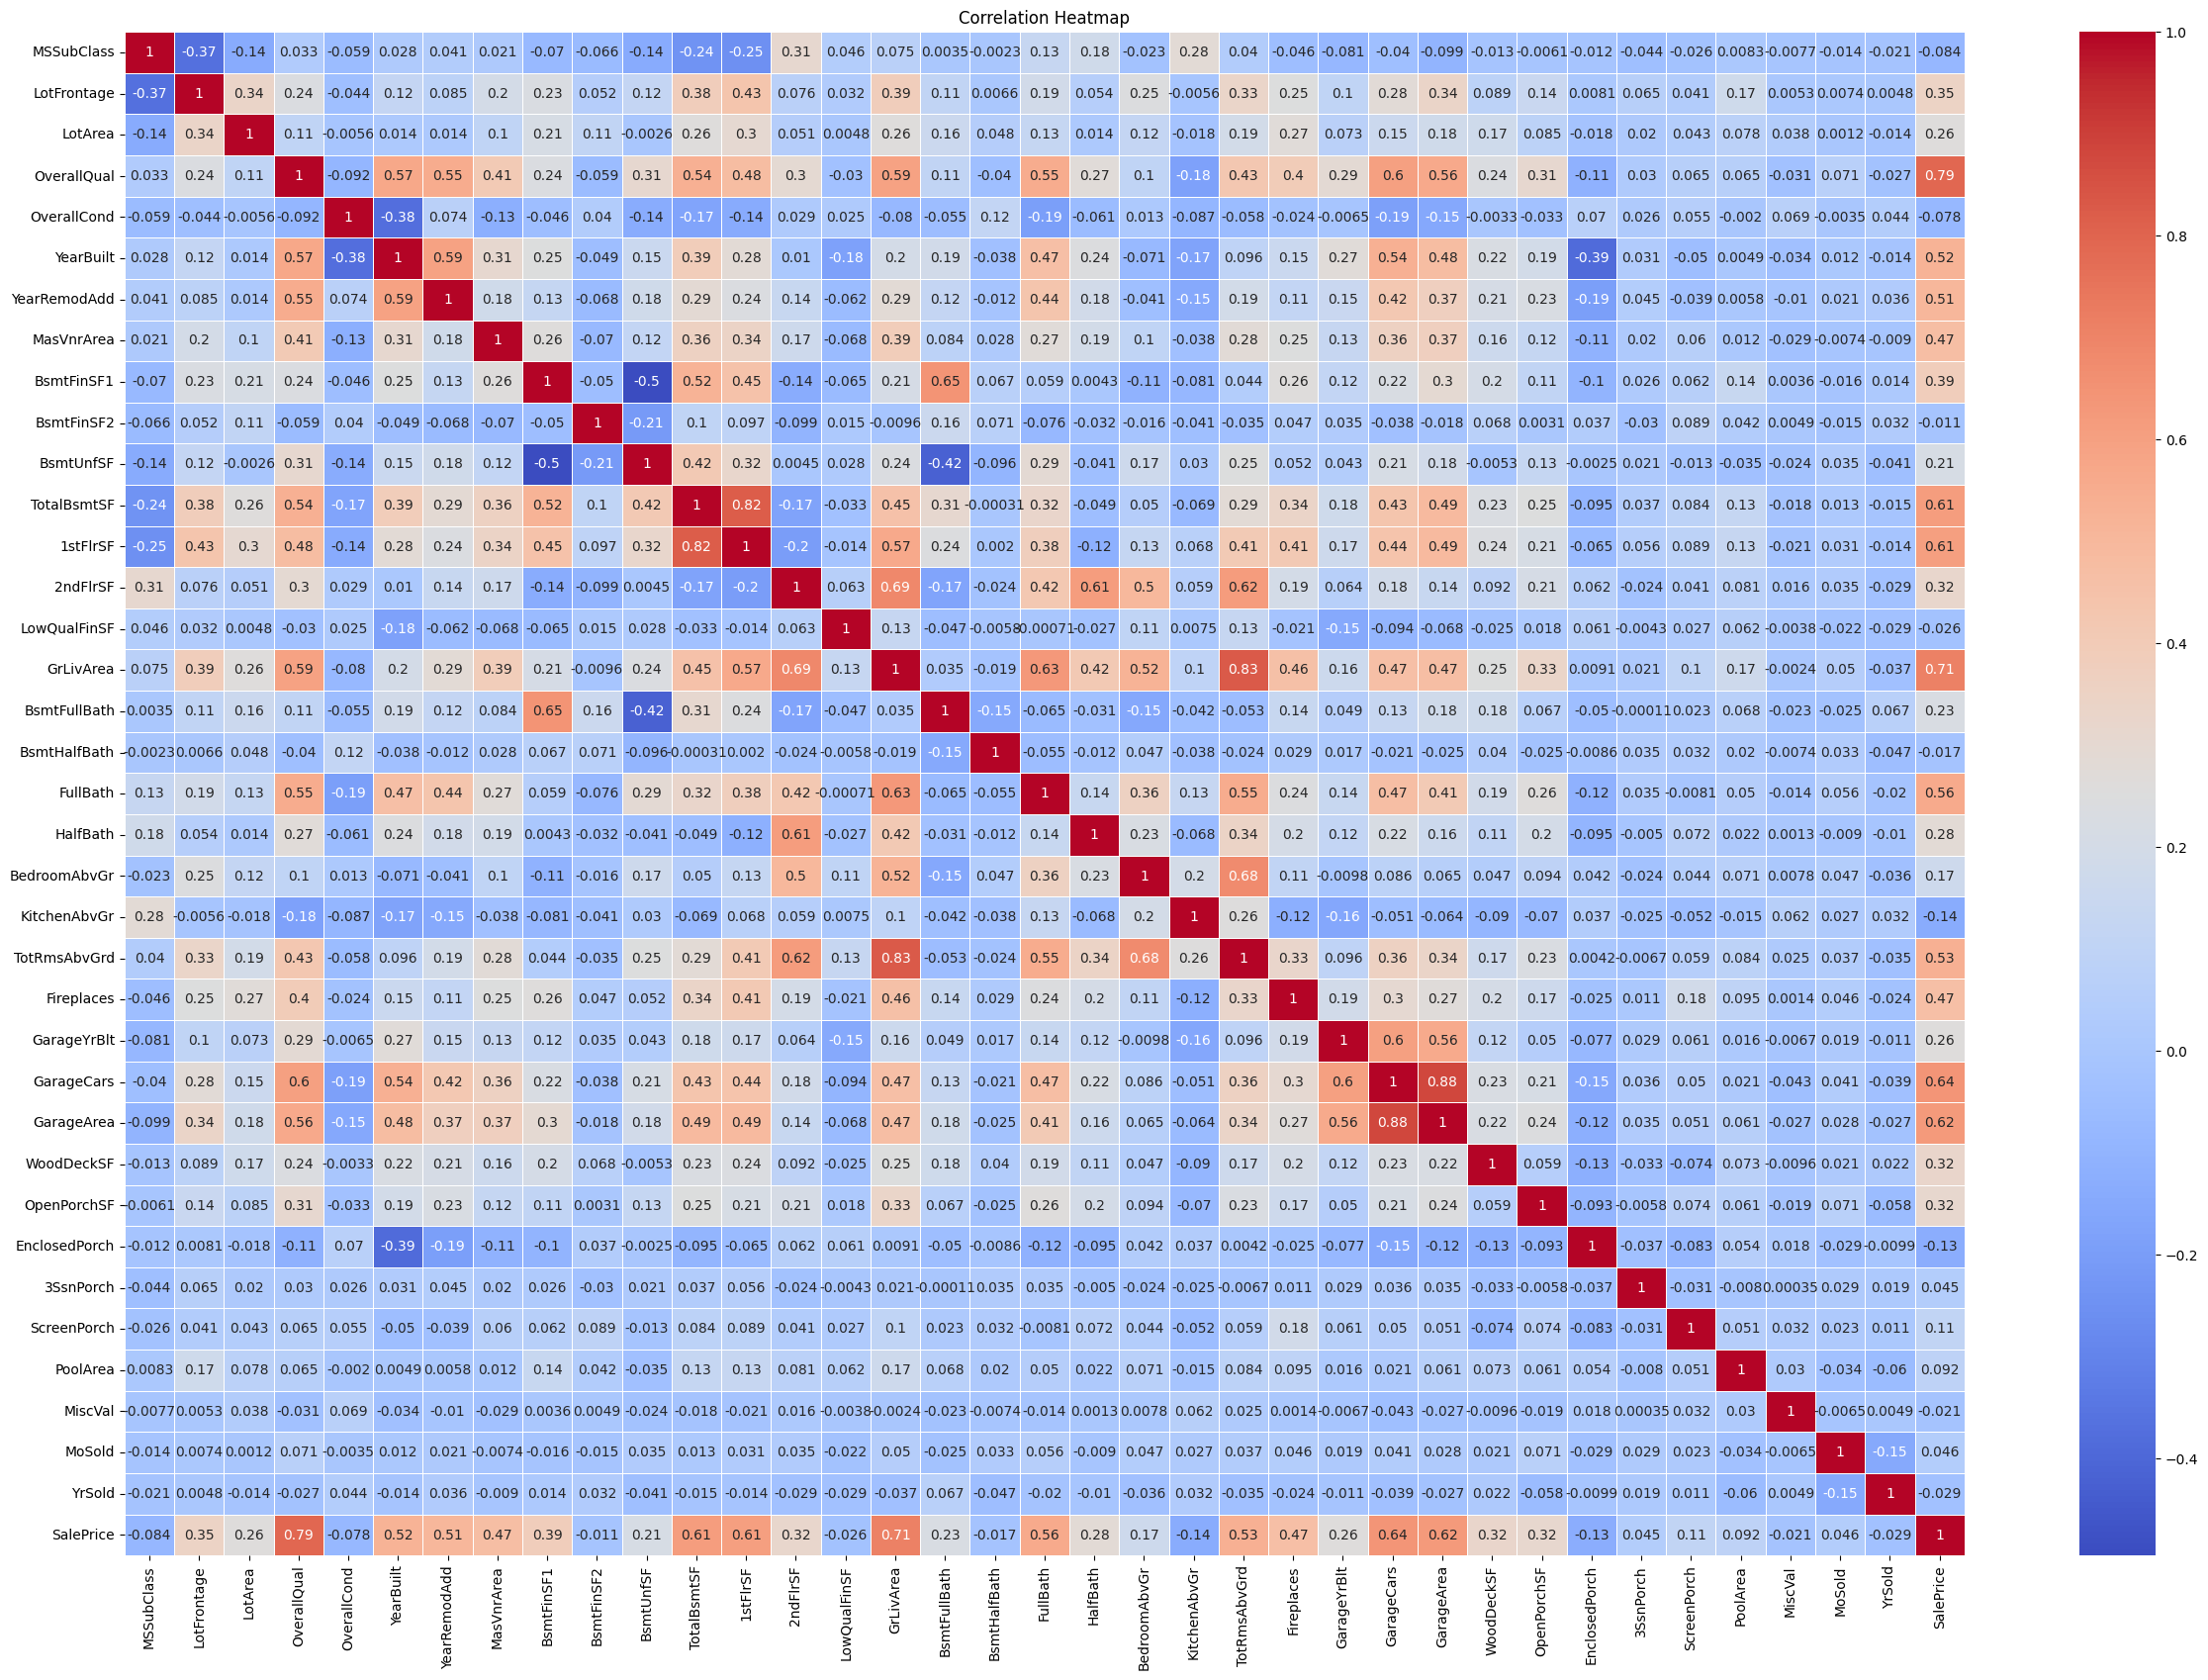

In [37]:
# Heatmap of correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [38]:
def encode_and_one_hot(df, columns_to_encode):
    df = df.copy()
    for col in columns_to_encode:
        df[col] = df[col].astype("category").cat.codes
      
    df = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False)

    return df

In [39]:
# List of columns to encode
columns_for_encoding = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
                           'FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageType',
                           'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond',
                           'BsmtQual', 'BsmtFinType1', 'Electrical', 'Condition2',
                           'BldgType', 'Neighborhood', 'LandSlope', 'LotConfig',
                           'Condition1', 'LandContour', 'LotShape', 'Street', 'MSZoning',
                           'Utilities', 'HouseStyle', 'Foundation', 'ExterQual',
                           'ExterCond', 'Heating', 'KitchenQual', 'Functional',
                           'PavedDrive', 'SaleType', 'SaleCondition', 'Exterior1st',
                           'Exterior2nd', 'RoofStyle', 'RoofMatl', 'CentralAir', 'HeatingQC']

# Numerical columns to be treated as categorical (added to encoding list)
columns_for_encoding.extend(['MSSubClass', 'OverallCond', 'OverallQual', 'MoSold',
                             'YrSold', 'KitchenAbvGr', 'FullBath', 'HalfBath',
                             'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
                             'Fireplaces', 'GarageCars', 'TotRmsAbvGrd', 'PoolArea'])

In [40]:
df = encode_and_one_hot(df, columns_for_encoding)

In [41]:
#fill NA with median
numerical_cols_with_na = [col for col in df.columns if df[col].isnull().any() and df[col].dtype in ['int32', 'float32', 'int64', 'float64']]
for col in numerical_cols_with_na:
    df[col] = df[col].fillna(df[col].median())

In [42]:
df.to_csv('data/processed/train.csv', index=False)